# Влияние количества кластеров на метрику

## Оценка влияния количества кластеров на метрику, используемую для составления лидерборда

In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from utils import DATAFILE_NAMES, TARGET_FEATURE, FIGSIZE, N_JOBS, load_all, target_split
from features import *
from models import MyKMeans, Equalizer, ClusterCounter
from solutions import SolutionSimple0, SolutionSimple1, SolutionSimple2
from scoring import clusterization_score_by_result

In [2]:
dfs = load_all()

In [3]:
def temp(df, n):
    return MyKMeans(n).fit(*target_split(df)).my_score(df)

In [4]:
# %%time
# nn = range(1,40)
# _, ax = plt.subplots(figsize=FIGSIZE)
# for num, df in enumerate(dfs, 1):
#     df = t_pca(df, 0.99)
#     c = Parallel(n_jobs=N_JOBS, prefer='processes')(delayed(temp)(df.dropna(), n) for n in tqdm(nn))
#     ax.plot(nn, c, label=f"Датасет №{num}")
# ax.set_xlabel('Количество кластеров')
# ax.set_ylabel('Метрика')
# ax.legend()

Вывод: метрика слабо зависит от соотношения реального и выбранного количества кластеров.

## Оценка метрик для поиска оптимального количества кластеров

### Общепринятый подход для KMeans

In [5]:
def temp(df, n):
    return np.sqrt(MyKMeans(n).fit(*target_split(df)).inertia_)

In [6]:
# %%time
# nn = range(1,40)
# _, ax = plt.subplots(figsize=FIGSIZE)
# for num, df in enumerate(dfs, 1):
#     df = t_pca(df, 0.99)
#     print(f"Количество кластеров в датасете №{num}: {len(df[TARGET_FEATURE].dropna().unique())}")
#     c = Parallel(n_jobs=N_JOBS, prefer='processes')(delayed(temp)(df.dropna(), n) for n in tqdm(nn))
#     ax.plot(nn, c, label=f"Датасет №{num}")
# ax.set_xlabel('Количество кластеров')
# ax.set_ylabel('Метрика')
# ax.legend()

Вывод: количество кластеров, определенное экспертом, значительно превосходит рекомендуемое количество кластеров.

### Использование других метрик

In [34]:
data = list(zip([dfs[0].iloc[::3], dfs[1].iloc[::1]], [(5, 30, 1), (10, 40, 1)]))

def temp(df, n, metric):
    x, y = target_split(df)
    return metric(x, MyKMeans(n).fit(x, y).predict(x))

def temp2(metric, temp=temp, data=data, pca=True, discrete=False, ax=None, subname=''):
    ls = ['-', ':']
    if ax is None:
        _, ax = plt.subplots(figsize=FIGSIZE)
    for num, (df, nn) in enumerate(data, 1):
        print(f"Количество кластеров в датасете №{num}: {len(df[TARGET_FEATURE].dropna().unique())}")
        if pca:
            df = t_pca(df, 0.99)
        if discrete:
            df = t_discrete(df, discrete)
        c = Parallel(n_jobs=N_JOBS, prefer='processes')(delayed(temp)(df.dropna(), n, metric) for n in tqdm(range(*nn)))
        ax.plot(range(*nn), c, label=f"Датасет №{num} {subname}", ls=ls[num-1])
    ax.set_xlabel('Количество кластеров')
    ax.set_ylabel(f"Метрика {metric.__name__}")
    ax.grid()
    ax.legend()
    return ax

#### silhouette_score

Количество кластеров в датасете №1: 26


  0%|          | 0/25 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/30 [00:00<?, ?it/s]

Wall time: 6min 24s


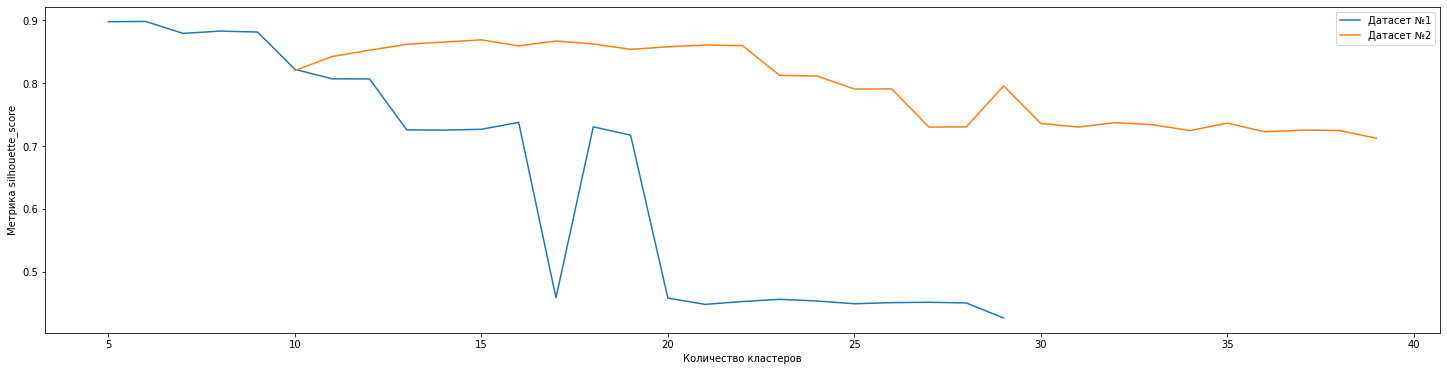

In [8]:
%%time
temp2(silhouette_score)

In [9]:
# %%time
# d1 = f_diff(t_pca(dfs[0].iloc[::3], 0.99))
# d2 = f_diff(t_pca(dfs[1].iloc[::1], 0.99))
# data = list(zip([d1, d2], [(5, 30, 1), (10, 50, 1)]))
# temp2(silhouette_score, data=data, pca=False)

Количество кластеров в датасете №1: 26


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №1: 26


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №1: 26


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №1: 26


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №1: 26


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №1: 26


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №1: 26


  0%|          | 0/48 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/48 [00:00<?, ?it/s]

Wall time: 1min 4s


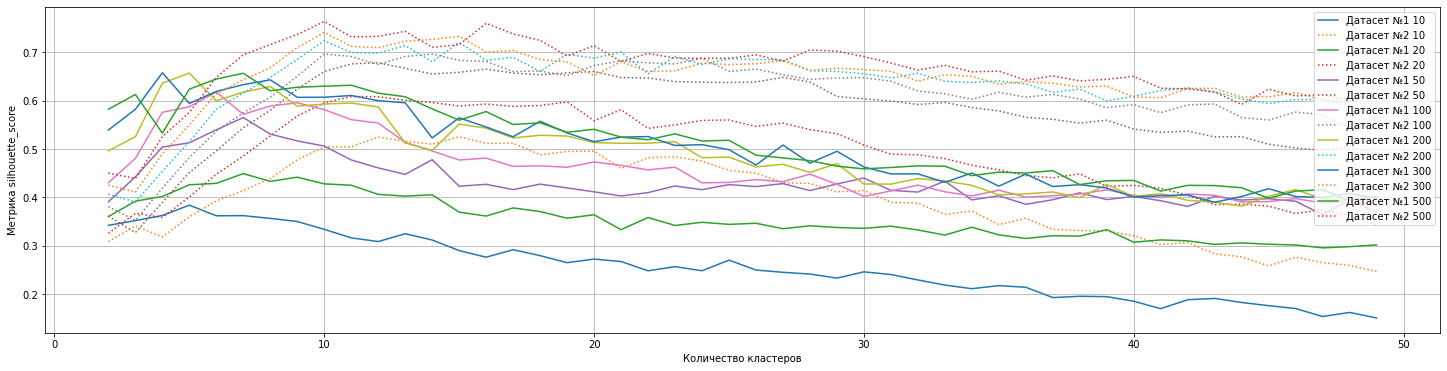

In [36]:
%%time
data = list(zip(dfs, [(2, 50, 1)] * 2))
ax = None
for i in (10, 20, 50, 100, 200, 300, 500):
    print(i)
    ax = temp2(silhouette_score, data=data, discrete=i, ax=ax, subname=str(i))

#### davies_bouldin_score

In [11]:
# %%time
# temp2(davies_bouldin_score)

#### calinski_harabasz_score

Количество кластеров в датасете №1: 26


  0%|          | 0/25 [00:00<?, ?it/s]

Количество кластеров в датасете №2: 15


  0%|          | 0/30 [00:00<?, ?it/s]

Wall time: 7.5 s


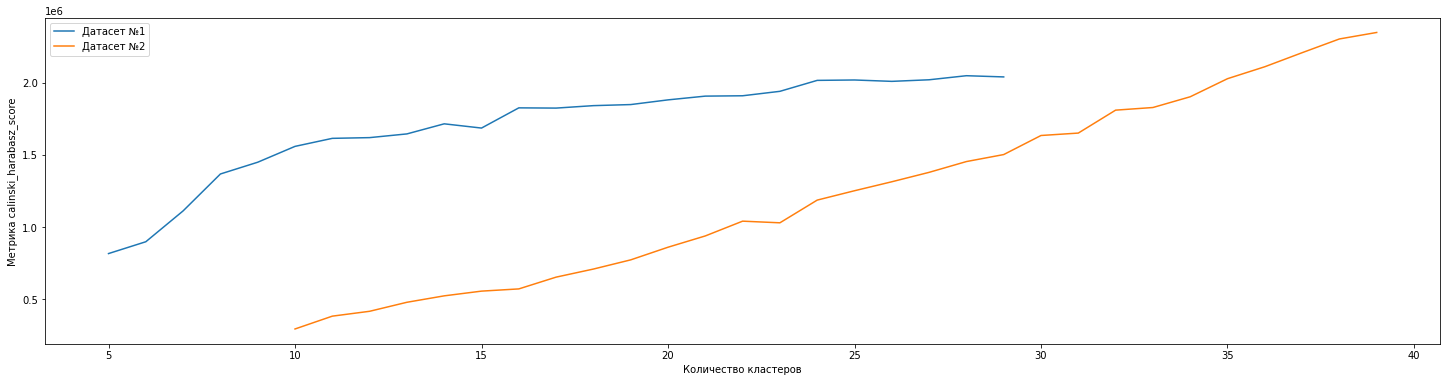

In [12]:
# %%time
# temp2(calinski_harabasz_score)

Вывод: silhouette_score дает наиболее удобные для использования результаты, однако как ее использовать не совсем понятно.